In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import circuit_lengths as cl

from problems.integer_knapsack import IntegerKnapsack
from fastqaoa.utils import styling
styling.set_my_style()

In [81]:
instances = IntegerKnapsack.get_instances()

penalty = "Slack-QUBO"
qpe = "IF-QAOA"

In [169]:
data = []
for N in instances.keys():
    for i in instances[N][:128]:
        depth = cl.layer_depth_penalty(i)
        gdata = cl.layer_qubit_ops_penalty(i)
        data.append({"N": N, "instance": i, "depth": depth, **gdata, "method": penalty})
        depth = cl.layer_depth_qpe(i)
        gdata = cl.layer_qubit_ops_qpe(i)
        data.append({"N": N, "instance": i, "depth": depth, **gdata, "method": qpe})


df = pd.DataFrame(data)
df["totalq"] = df.twoq + df.singleq

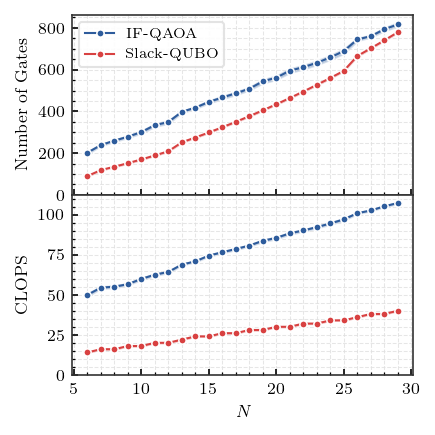

In [170]:
fig, axs = plt.subplots(2, 1, figsize=(3, 3), sharex=True)
sns.lineplot(df, x="N", y="totalq", hue="method", ax=axs[0], hue_order=[qpe, penalty], marker="o")
axs[0].legend(title="")
sns.lineplot(df, x="N", y="depth", hue="method", ax=axs[1], hue_order=[qpe, penalty], marker="o", legend=False)
for a in axs:
    a.set_ylim(0, None)
fig.tight_layout()

axs[-1].set_xlabel("$N$")
axs[0].set_ylabel("Number of Gates")
axs[1].set_ylabel("CLOPS")

fig.subplots_adjust(hspace=0)

---

In [172]:
data = []
for N in range(10, 105, 5):
    i = IntegerKnapsack.random_instance(N)
    for M in range(10, 105, 5):
        depth = cl.layer_depth_penalty(i, M=M)
        gdata = cl.layer_qubit_ops_penalty(i, M=M)
        data.append({"N": N, "M": M, "depth": depth, **gdata, "method": penalty})
        depth = cl.layer_depth_qpe(i, M=M)
        gdata = cl.layer_qubit_ops_qpe(i, M=M)
        data.append({"N": N, "M": M, "depth": depth, **gdata, "method": qpe})


rdf = pd.DataFrame(data)
rdf["totalq"] = rdf.twoq + rdf.singleq

ValueError: zero-size array to reduction operation fmin which has no identity

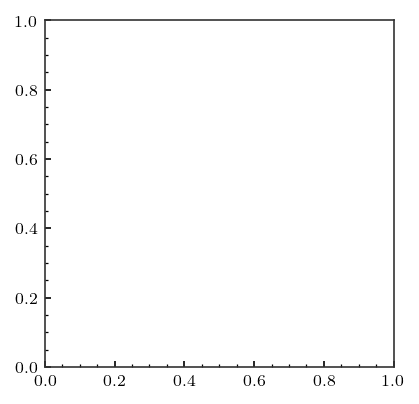

In [173]:
fig, ax = styling.subplots(figsize=(3, 3))
ax.grid(which="both", visible=False)

dfx = rdf.query("method == 'qpe'").pivot(columns="N", index="M", values="totalq")

sns.heatmap(dfx, annot=False)

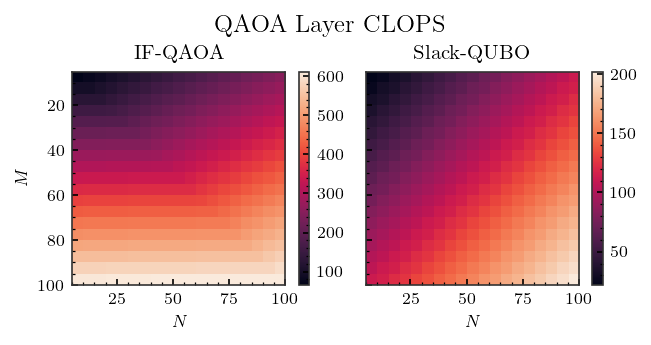

In [174]:
fig, axs = styling.subplots(1,2, sharex=True, sharey=True, figsize=(4.5, 2.5))

palette = sns.color_palette("rocket", as_cmap=True)

n = "depth"
vmin = np.min(rdf[n])
vmax = np.max(rdf[n])
vmin = vmax = None
for ax, (t, m) in zip(axs, rdf.groupby("method")):
    dfx = m.pivot(columns="N", index="M", values=n)
    r = ax.imshow(dfx.to_numpy(), extent=(5, 100, 100, 5), vmin=vmin, vmax=vmax, cmap=palette, aspect="auto")
    fig.colorbar(r)
    ax.grid(which="both", visible=False)
    ax.set_title(t)
    ax.set_xlabel("$N$")
    if t == "IF-QAOA":
        ax.set_ylabel("$M$")

fig.suptitle("QAOA Layer CLOPS", y=0.9)

plt.tight_layout()
plt.subplots_adjust(wspace=0.1)

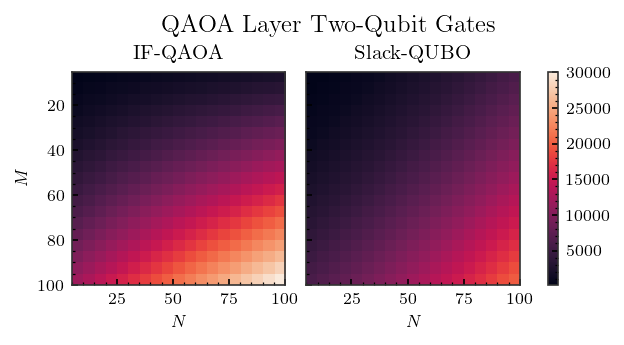

In [175]:
fig, axs = styling.subplots(1,2, sharex=True, sharey=True, figsize=(4.5, 2.5))

palette = sns.color_palette("rocket", as_cmap=True)

n = "twoq"
vmin = np.min(rdf[n])
vmax = np.max(rdf[n])

imgs = []
for ax, (t, m) in zip(axs, rdf.groupby("method")):
    dfx = m.pivot(columns="N", index="M", values=n)
    imgs.append(ax.imshow(dfx.to_numpy(), extent=(5, 100, 100, 5), vmin=vmin, vmax=vmax, cmap=palette, aspect="auto"))
    ax.grid(which="both", visible=False)
    ax.set_title(t)
    ax.set_xlabel("$N$")
    if t == "IF-QAOA":
        ax.set_ylabel("$M$")



fig.suptitle("QAOA Layer Two-Qubit Gates", y=0.9)
plt.tight_layout()
plt.subplots_adjust(wspace=0.1)

plt.colorbar(imgs[0], ax=axs, orientation="vertical")